In [147]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engineering import (price_new_features)
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import datetime as dt
import pickle
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
from sklearn.metrics import mean_absolute_percentage_error as mape

In [82]:
# importing data
data = pd.read_csv('data/curr_price_financial_fill.csv')
margin_preds = pd.read_csv('data/margin_preds.csv')

In [227]:
# getting data for one SecurityCode
df = data.query('SecuritiesCode == 7203')
#df = df.drop([['rev_ttm_growth', 'win_ttm_growth', 'rev_ttm', 'Profit_ttm']], axis=1)
# setting date as index
#df = df.set_index('Date')
#df.index = pd.to_datetime(df.index)
# dropping na values
df = df.dropna(axis=0)
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
# splitting train and test
train = df[:-10]
test = df[-10:]
len(test)

10

In [237]:
# implementing model
model = ARIMA(endog = train.ad_Close, order=(2, 1, 10))
# fitting model
model_fit = model.fit()
# print summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               ad_Close   No. Observations:                 1106
Model:                ARIMA(2, 1, 10)   Log Likelihood               -6685.145
Date:                Fri, 06 May 2022   AIC                          13396.289
Time:                        11:42:36   BIC                          13461.388
Sample:                             0   HQIC                         13420.911
                               - 1106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4002      0.024     59.032      0.000       1.354       1.447
ar.L2         -0.9726      0.022    -43.435      0.000      -1.017      -0.929
ma.L1         -1.3622      0.034    -39.865      0.0

In [238]:
preds = model_fit.forecast(10)
print(mape(test.ad_Close, preds)*100)

2.098417763905054


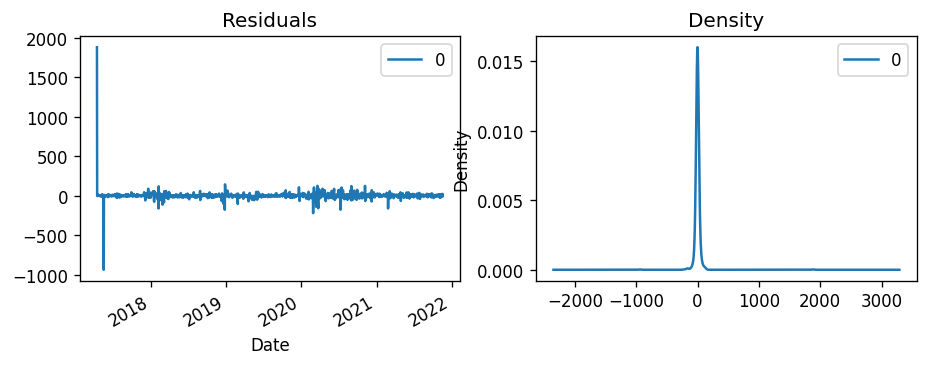

In [223]:
# plotting residuals of model
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [160]:
# forecasting for the test data
preds = model_fit.forecast(1)


In [101]:
# creating two lists of train price and predictions and real prices
prediction = df.ad_Close.to_list()[:-len(test.ad_Close)] + preds.to_list()
real = df.ad_Close.to_list()

<AxesSubplot:ylabel='ad_Close'>

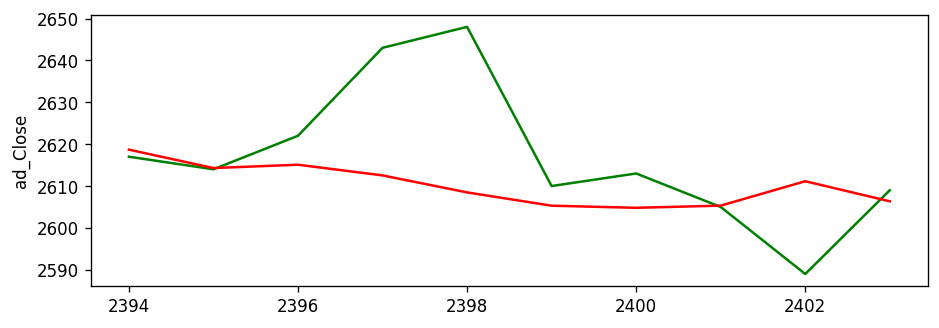

In [104]:
# plotting real prices and predictions
import matplotlib.pyplot as plt
#set(xlim=("2021-11-03","2021-12-03"))
sns.lineplot(test.index, test.ad_Close, color="green")


sns.lineplot(test.index, preds, color="red")



In [109]:
# calculating rmse and rmse/avg price
score = mean_squared_error(test.ad_Close.to_list(), preds, squared=False)
print(score)
print(score / df.ad_Close.mean())

17.684327771328526
0.007535855838415055


In [1]:
print(mape(test.ad_Close.to_list(), preds)*100)

NameError: name 'mape' is not defined

In [ ]:
filename = '7203_arima.sav'
pickle.dump(model_fit, open(filename, 'wb'))